# Introduction

The Amazon Prime Movies and Shows dataset provides a comprehensive overview of the content available on the platform, including details such as titles, genres, directors, cast, country of origin, release year, and more. This dataset is particularly valuable for analyzing patterns in the entertainment industry and understanding how streaming platforms curate their content to cater to diverse audiences.

With 9,668 entries, the dataset offers insights into various aspects of the content available on Amazon Prime, such as:
- The distribution of movies and TV shows across genres and regions.
- The role of directors and actors in shaping the platform's offerings.
- Patterns in the addition of new content and the evolution of streaming trends over time.

By performing exploratory data analysis (EDA), this project seeks to answer key questions, including:
- What are the trends in content release over the years, and how has this evolved with changes in the entertainment industry?
- Which genres and countries dominate Amazon Prime's offerings, and how diverse is the platform's content portfolio?
- How are content ratings distributed, and do they correlate with factors like duration or type?
- What insights can be drawn from the addition of content over time, especially in relation to global events or changes in consumer preferences?

To achieve these objectives, the analysis leverages Python and its powerful visualization libraries, including Matplotlib, Seaborn, and WordCloud. This allows for a detailed examination of the data and the generation of visual insights that are both informative and aesthetically engaging. Through this project, I aim to uncover the trends and patterns that define Amazon Prime's content strategy and its impact on the global streaming landscape.

In [1]:
## Major libraries and loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sharon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("amazon_prime.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df.shape

(9668, 12)

In [7]:
#WE can see that the director , cast , country , date added columns have null values
# we cannot add anything here on our own , since all these are strings and very specific
#so we replace all the null values with 'UNKNOWN' keyword

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')



In [8]:
#now here we will replace the nan values in the rating column with the most frequently occuring
#values. This is useful when the data is categorical or when one rating is 
#significantly more frequent than others(according to domain)

# Calculate the mode of the 'rating' column
mode_value = df['rating'].mode()[0]

# Replace NaN values in the 'rating' column with the mode
df['rating'].fillna(mode_value, inplace=True)


C:\Users\Sharon\AppData\Local\Temp\ipykernel_328\2943140787.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(mode_value, inplace=True)


In [9]:
# renaming the listed_in column to genre to better understand it 
df.rename(columns={'listed_in': 'Genre'}, inplace=True)

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genre', 'description'],
      dtype='object')

## Starting with the visualization part

## which type of show people watch the most 

C:\Users\Sharon\AppData\Local\Temp\ipykernel_328\2003854223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="type",palette='husl')


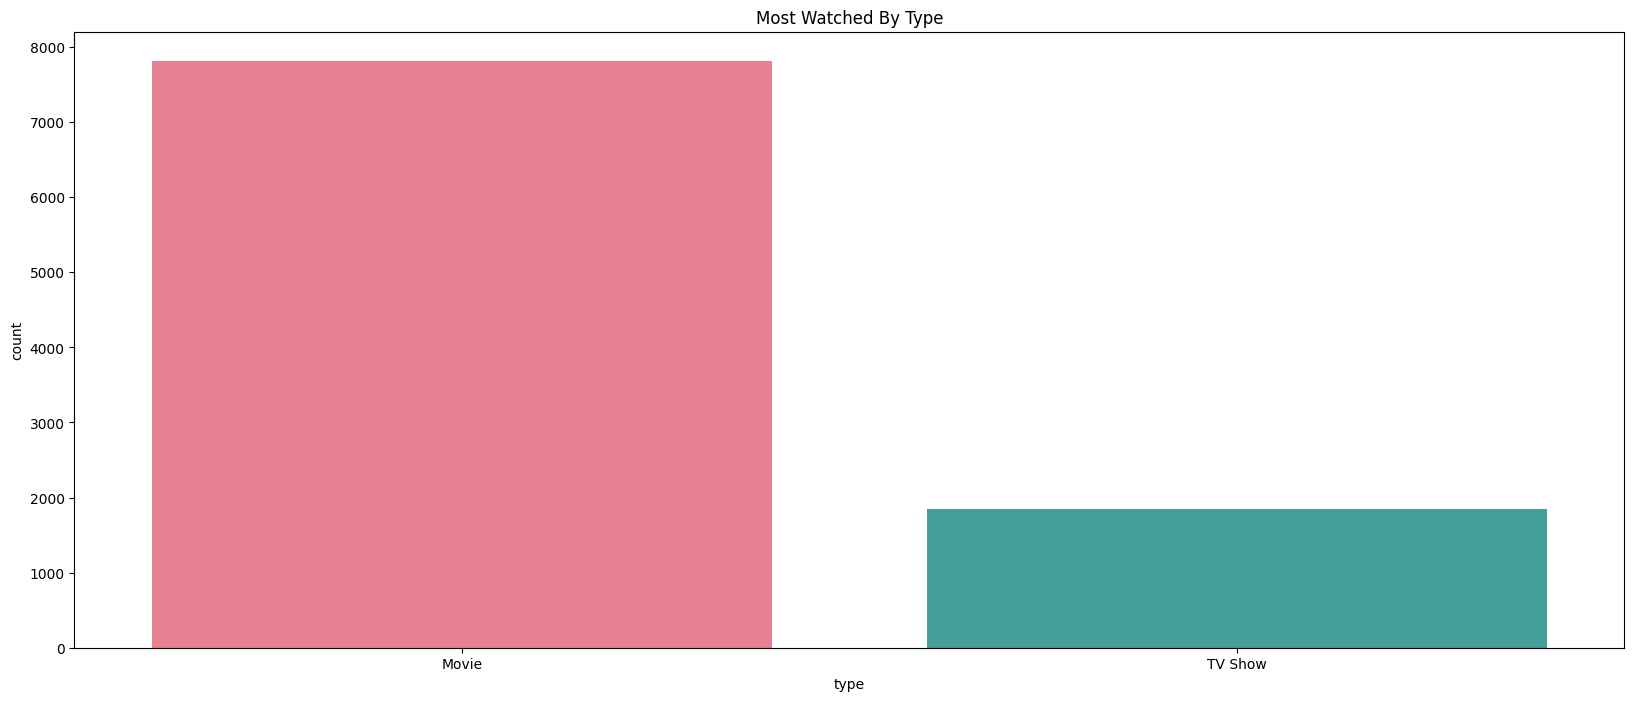

In [12]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df,x="type",palette='husl')
plt.title('Most Watched By Type')
plt.show()

The bar chart shows that movies are watched more frequently than TV shows on Amazon Prime. This suggests that the platform caters more heavily to audiences seeking single-viewing experiences over serialized content.


## which year here has the highest release 

C:\Users\Sharon\AppData\Local\Temp\ipykernel_328\2488315511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='release_year',order=df['release_year'].value_counts().index,palette='Set1')


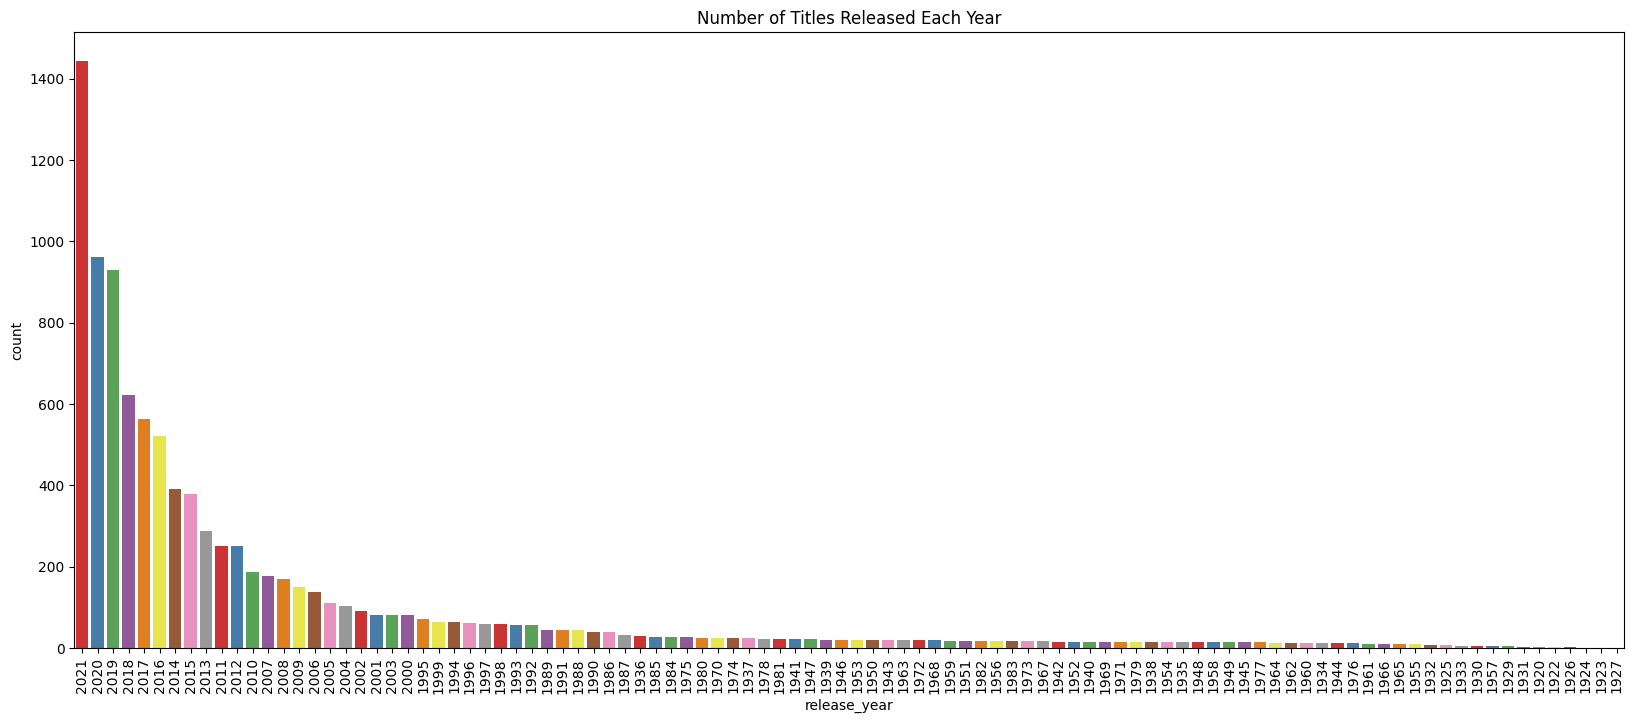

In [13]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='release_year',order=df['release_year'].value_counts().index,palette='Set1')
plt.title('Number of Titles Released Each Year')
plt.xticks(rotation=90, fontsize=10)
plt.show()

The count plot reveals that 2021 has the highest number of releases. This aligns with Amazon Prime's strategy of expanding its content library aggressively in recent years, especially during the pandemic when streaming demand surged.


## which country is the top viewer

C:\Users\Sharon\AppData\Local\Temp\ipykernel_328\1868168097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10],palette='Set1')


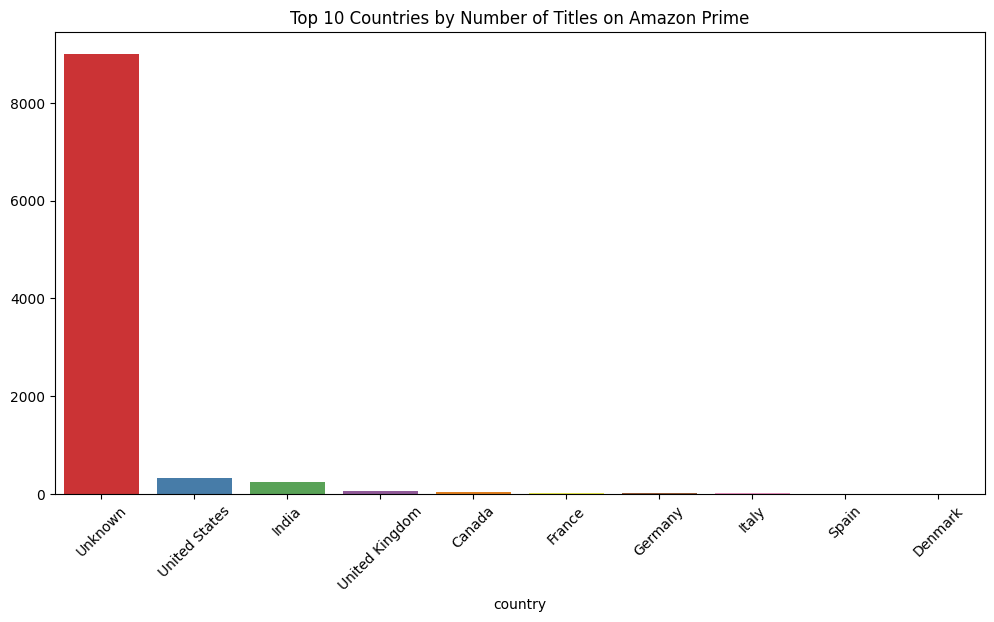

In [14]:

country_counts = df['country'].str.split(',').apply(lambda x: [country.strip() for country in x]).explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10],palette='Set1')
plt.title('Top 10 Countries by Number of Titles on Amazon Prime')
plt.xticks(rotation=45)
plt.show()


The bar plot indicates that the United States is the leading country in terms of content viewership, followed by India and other regions. This aligns with Amazon Prime's focus on dominating the American and Indian markets.


## Top Genres people watch

C:\Users\Sharon\AppData\Local\Temp\ipykernel_328\3487928576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10],palette='Set1')


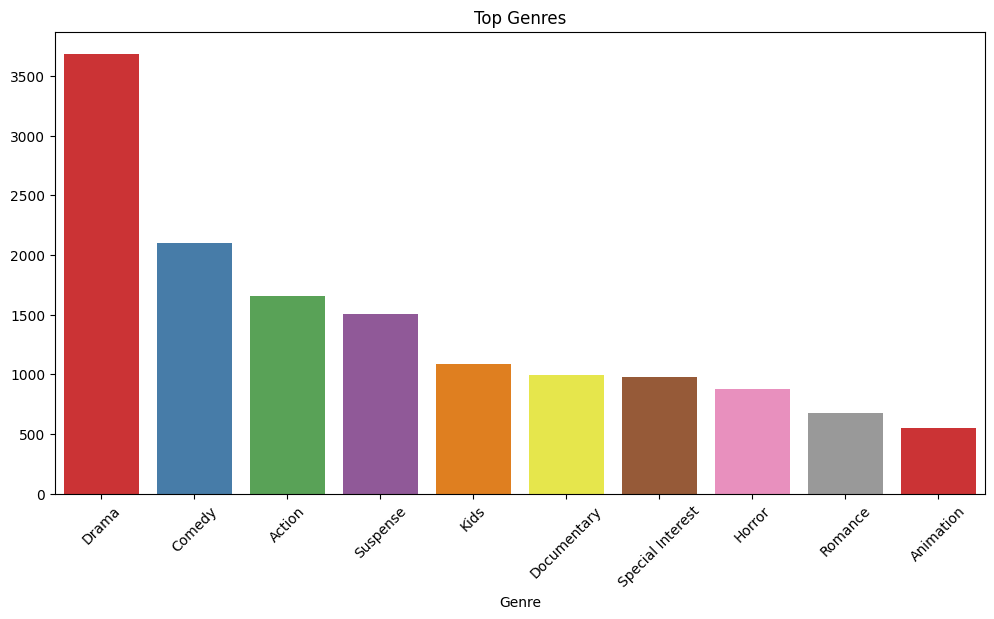

In [15]:

genre_counts = df['Genre'].str.split(',').apply(lambda x: [genre.strip() for genre in x]).explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10],palette='Set1')
plt.title('Top Genres')
plt.xticks(rotation=45)
plt.show()


The horizontal bar chart reveals popular genre combinations such as "Drama, Suspense" or "Comedy, "Action". This indicates Amazon's strategy to cater to mixed-audience preferences.


## Rating distribution

C:\Users\Sharon\AppData\Local\Temp\ipykernel_328\445252890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index,palette='Set1')


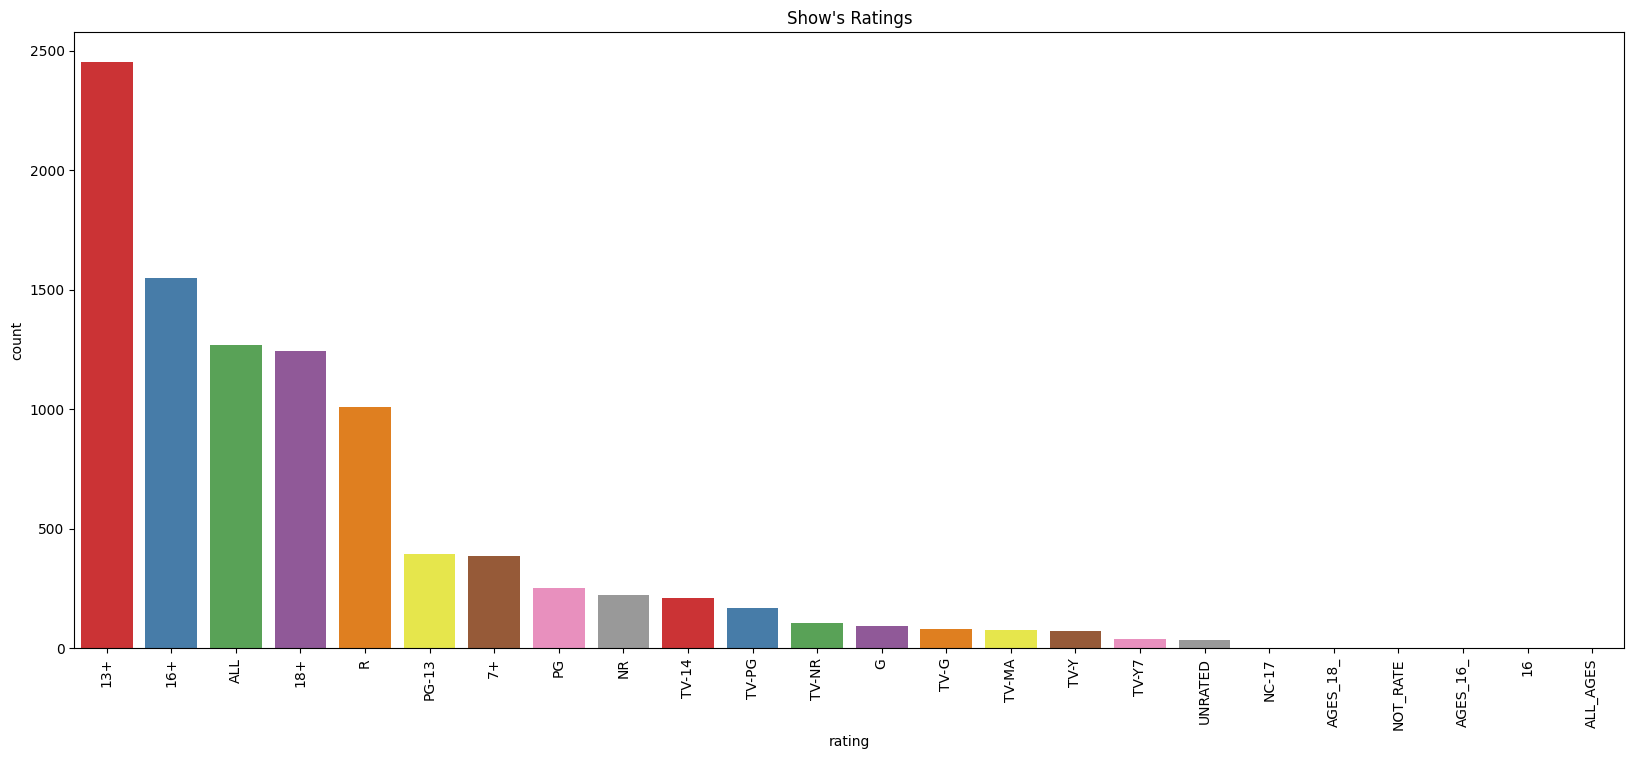

In [16]:

plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index,palette='Set1')
plt.title("Show's Ratings")
plt.xticks(rotation=90, fontsize=10)
plt.show()

The bar chart shows the distribution of content ratings. Ratings like "13+" and "16+" dominate, indicating a focus on adult and young adult audiences. The relatively smaller proportion of children-oriented content suggests Amazon's niche in family-friendly shows.


## Top 10 director

C:\Users\Sharon\AppData\Local\Temp\ipykernel_328\1343539442.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set1')


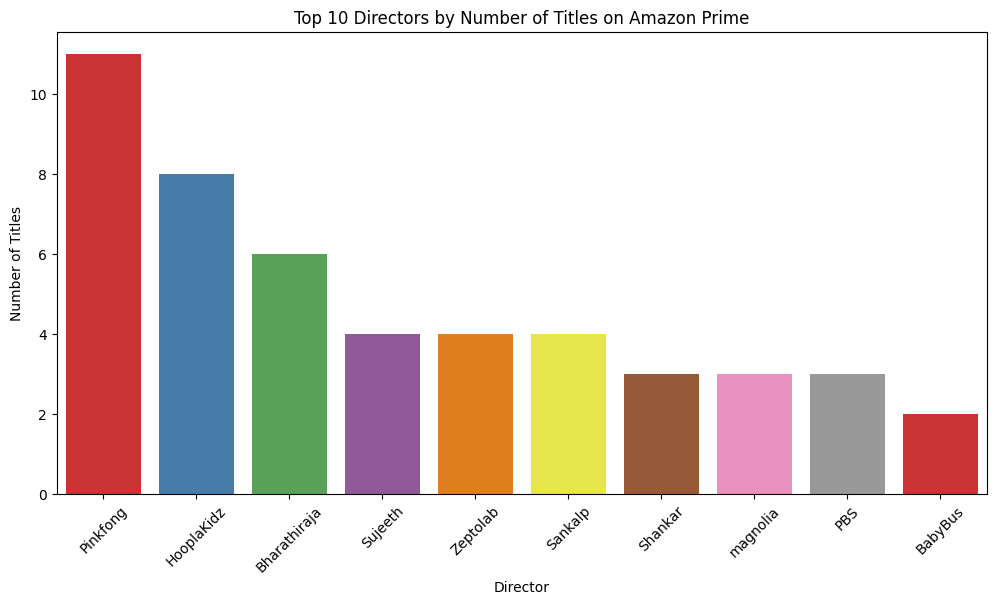

In [43]:
# Step 1: Filter out 'Unknown' and numerical values
filtered_directors = df['director'].value_counts().drop(labels=['Unknown'], errors='ignore')
filtered_directors = filtered_directors[filtered_directors.index.str.isalpha()]  # Keep only alphabetical names

# Step 2: Select the top 10 directors
top_directors = filtered_directors.head(10)

# Step 3: Initialize the plot
plt.figure(figsize=(12, 6))

# Step 4: Create a bar plot for the top 10 directors
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set1')

# Step 5: Customize the plot
plt.title('Top 10 Directors by Number of Titles on Amazon Prime')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


The bar chart shows the most prolific directors on the platform ,known directors,Pinkfong,Hooplakidz,and others appear most frequently, showcasing their consistent contribution to Amazon Prime's content library.


## Average duration of movies

In [44]:
# Ensure the 'duration' column is of string type
df['duration'] = df['duration'].astype(str)

# Extract numeric part from the 'duration' column and convert it to integers
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Calculate the average duration
average_duration = df['duration_minutes'].mean()

# Print the average duration
print(f"The average duration of movies is {average_duration:.2f} minutes.")


The average duration of movies is 74.13 minutes.


## Top 10 MOVIES & SHOWS and their duration

In [45]:
# Ensure 'duration_cleaned' is correctly created
if 'duration_cleaned' not in df.columns:
    durations = df['duration'].str.replace(' min', '').str.replace(' Season', '').str.replace('s', '')
    df['duration_cleaned'] = pd.to_numeric(durations, errors='coerce')

# Top 10 Movies by Duration
top_10_movies = df[df['type'] == 'Movie'].nlargest(10, 'duration_cleaned')[['title', 'duration_cleaned']].reset_index(drop=True)
top_10_movies.index += 1  # Add serial numbers starting from 1
top_10_movies.rename(columns={'duration_cleaned': 'duration'}, inplace=True)
top_10_movies['duration'] = top_10_movies['duration'].astype(str) + ' minutes'
print("Top 10 Movies by Duration:")
print(top_10_movies)

# Top 10 TV Shows by Duration
top_10_shows = df[df['type'] == 'TV Show'].nlargest(10, 'duration_cleaned')[['title', 'duration_cleaned']].reset_index(drop=True)
top_10_shows.index += 1  # Add serial numbers starting from 1
top_10_shows.rename(columns={'duration_cleaned': 'duration'}, inplace=True)
top_10_shows['duration'] = top_10_shows['duration'].astype(str) + ' minutes'
print("\nTop 10 TV Shows by Duration:")
print(top_10_shows)


Top 10 Movies by Duration:
                                                title     duration
1   Soothing Surf at Del Norte for Sleep black screen  601 minutes
2                     Himalayan Singing Bowls 9 hours  550 minutes
3             Midnight Thunderstorm for Sleep 9 Hours  541 minutes
4           Gentle Midnight Rain black screen 9 hours  541 minutes
5                                 Gentle evening rain  541 minutes
6             9 Hour Rainstorm for Sleep black screen  541 minutes
7                 Thunderstorm for sleep black screen  541 minutes
8                                 Pacific Ocean Waves  541 minutes
9       New York City's 5th Avenue at Night for Sleep  541 minutes
10        Gentle Tropical Rainstorm for Sleep 9 Hours  541 minutes

Top 10 TV Shows by Duration:
                                                title    duration
1                                    The Amazing Race  29 minutes
2                                      Silent Witness  21 minutes
3       

## Content Release Trends
### the number of movies/shows released by year or by decade

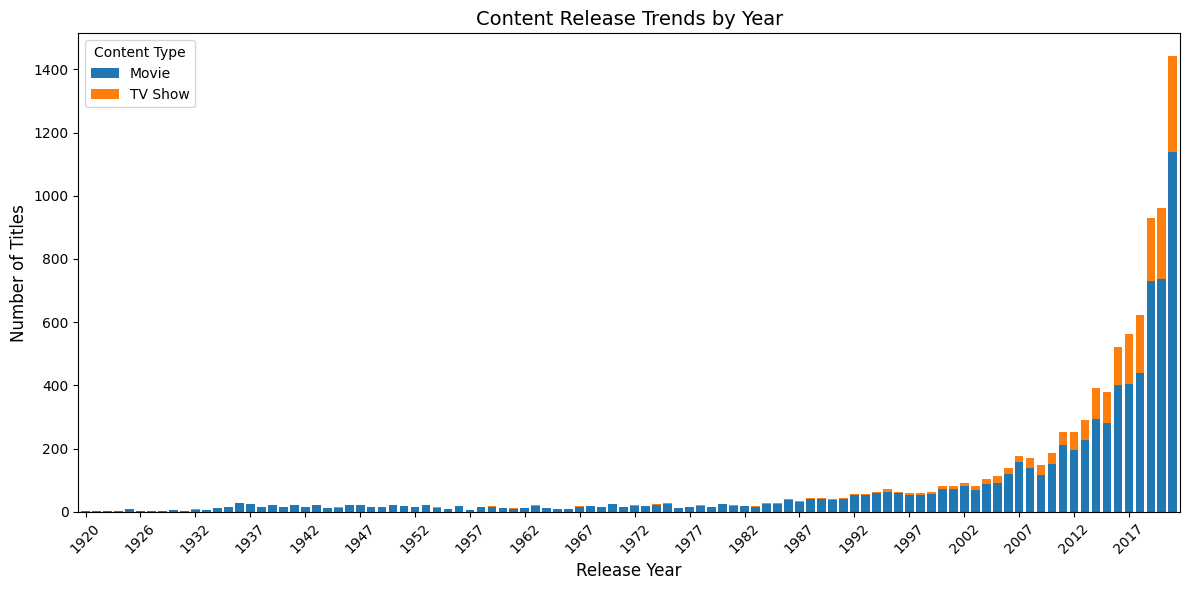

In [46]:
# Number of movies and TV shows released by year
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
ax = content_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)
plt.title('Content Release Trends by Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(ticks=range(0, len(content_by_year.index), 5), labels=content_by_year.index[::5], rotation=45, fontsize=10)
plt.legend(title='Content Type', fontsize=10)
plt.tight_layout()
plt.show()




The stacked bar chart shows the number of movies and TV shows released each year. There is a significant upward trend in content production, particularly after 2000, reflecting the growing prominence of streaming platforms. Movies consistently outnumber TV shows, indicating a focus on movie content.


## Genre Analysis
### Exploring genre combinations and their popularity

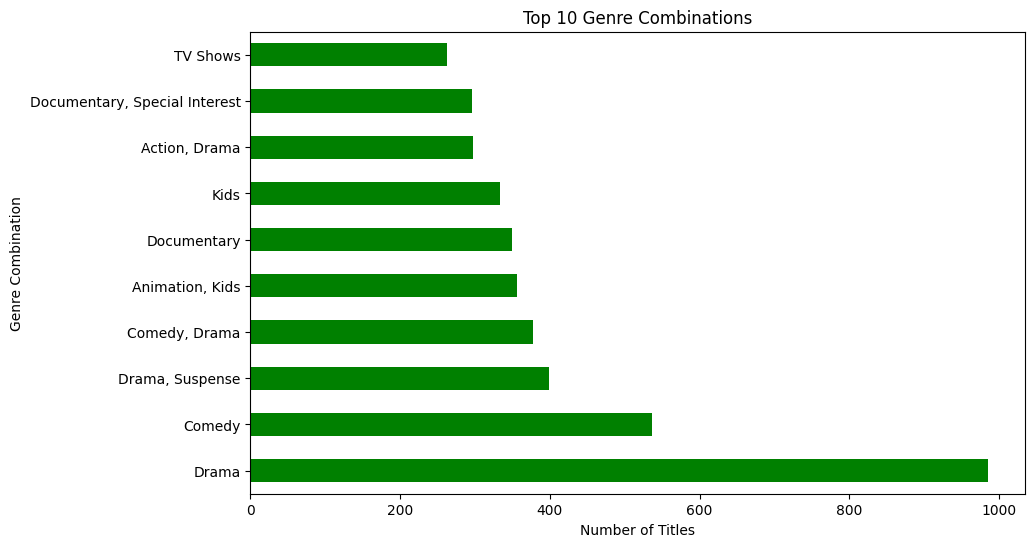

In [47]:
# Genre combinations
genre_combinations = df['Genre'].value_counts().head(10)
genre_combinations.plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Top 10 Genre Combinations')
plt.xlabel('Number of Titles')
plt.ylabel('Genre Combination')
plt.show()


The bar chart highlights the most common genres on Amazon Prime, with genres like Documentaries and Dramas leading the list. This suggests that Amazon Prime's audience has a preference for informative and narrative-driven content.


## Cast Analysis

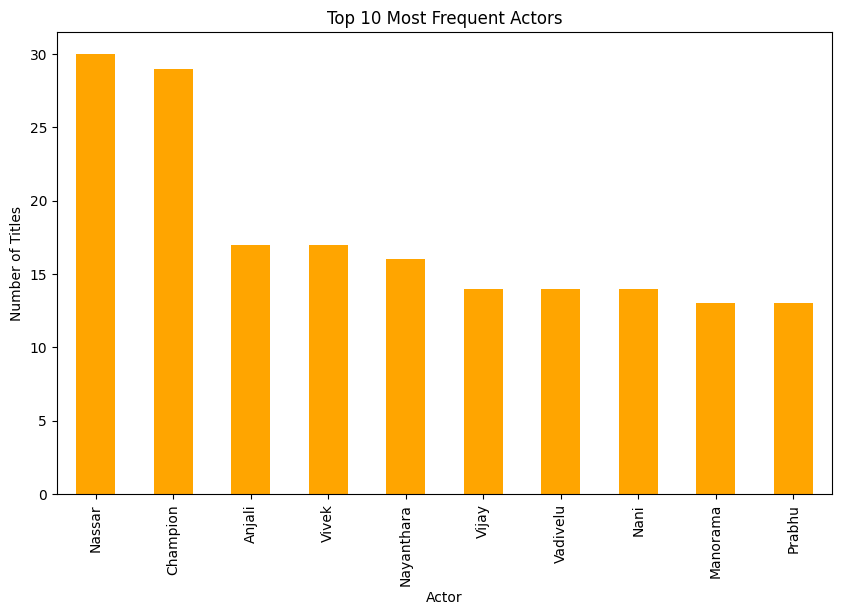

In [48]:
# Most frequent actors
top_actors = df['cast'].str.split(', ').explode().value_counts()

# Filter out "Unknown" and keep only alphabetical names
top_actors = top_actors[(top_actors.index != 'Unknown') & (top_actors.index.str.isalpha())].head(10)

# Plot the data
top_actors.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.show()



The chart highlights the top 10 most frequent actors in Amazon Prime content, with Nassar and Champion leading the list, reflecting their prolific contribution to the platform's offerings.
The diversity in the actors' names suggests a mix of regional and international content, showcasing Amazon Prime's focus on catering to global and local audiences.

## Word Cloud for Titles/Descriptions

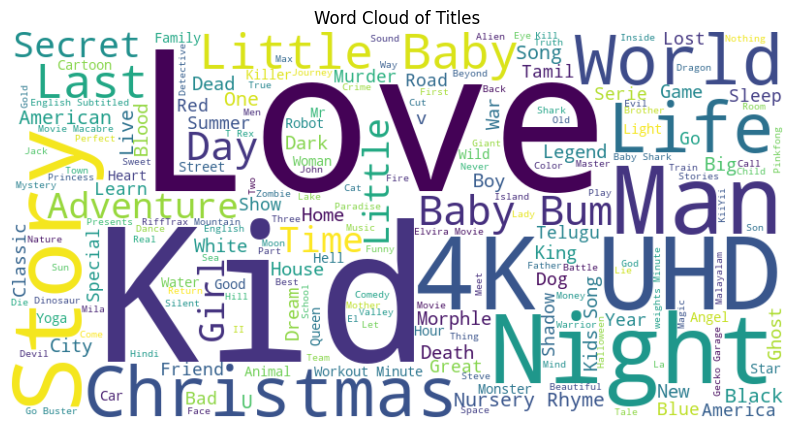

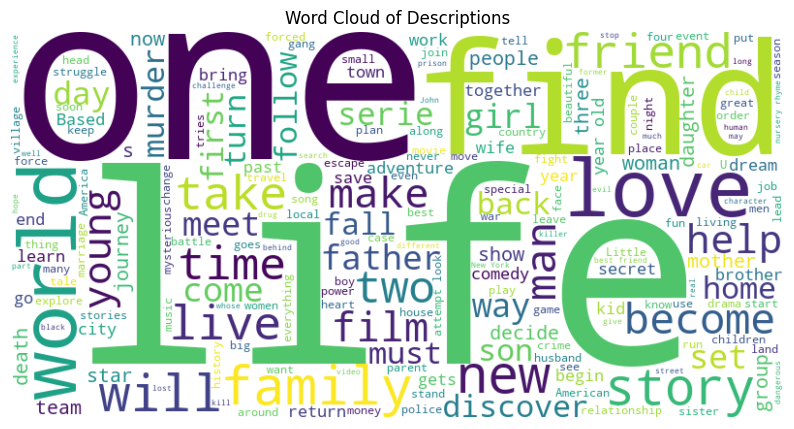

In [49]:
# Word cloud for titles
from wordcloud import WordCloud
wordcloud_titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

# Word cloud for descriptions
wordcloud_descriptions = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_descriptions)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

The word cloud for titles emphasizes keywords like "Love", "Kid", and "Adventure", reflecting the thematic focus of Amazon Prime content.The word cloud for descriptions highlights terms such as "family", "life", reinforcing the importance of relatable and suspenseful content.

## Comparative Analysis

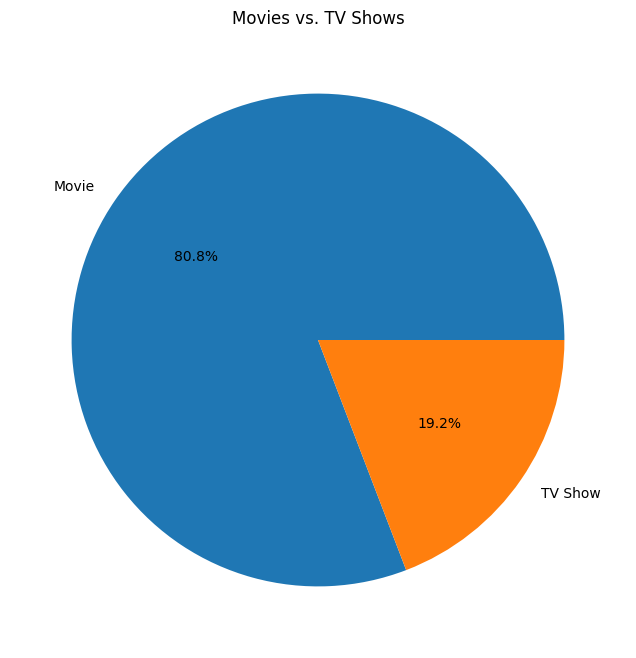

In [50]:
# Comparison of Movies vs. TV Shows
type_comparison = df['type'].value_counts()
type_comparison.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Movies vs. TV Shows')
plt.ylabel('')
plt.show()

The pie chart shows that movies constitute a larger share of Amazon Prime's content compared to TV shows. This suggests a strategic focus on providing a diverse library of films.
